In [22]:
from inferline_optimizer_experiments import generate_nasa_arrival_process
from data_fetch_utils import fetch_and_cache_gdrive
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [91]:
def CV(segment):
    diffs = np.diff(segment)
    return np.var(diffs)/np.square(np.mean(diffs))

In [108]:
def segment_length(segment):
    return (segment[-1]-segment[0])/1000./60

In [119]:
def segment_mean_rate(segment):
    return (len(segment) / segment[-1]) * 1000

In [126]:
def summarize(trace):
    print("CV", CV(trace))
    print("Mean Lambda", segment_mean_rate(trace))
    print("# of querries", len(trace))
    print("Duration", segment_length(trace))

In [2]:
nasa_ts = generate_nasa_arrival_process(100)

downloading data
Downloading...

Downloaded NASA_access_log_Jul95.gz!
MD5 hash of file: b7e1447e521cdb602f51e78a170db542
Downloading...

Downloaded NASA_access_log_Aug95.gz!
MD5 hash of file: 5eb26c301d3a7476fbc289e95ed4d4ae
cleaning timestamps
computing offset in ms
saving timestamps
Loading data from cache
Scaling the QPS from {qps} QPS to {avg_qps} QPS.


In [124]:
from data_fetch_utils import fetch_and_cache_gdrive
twitter = np.load(fetch_and_cache_gdrive("16UcsRUflJMPg4X2RdCGIvl8flIROpWiT", "twitter_ts.npy"))
twitter = twitter - twitter[0]
twitter = twitter[twitter < (1000 * 60 * 60 * 36)]

Using version already downloaded: Sun Apr 29 00:13:16 2018
MD5 hash of file: 2bb65438ef5920738bb312edd1df3ceb


CV 4.359002258254671
Mean Lambda 55.08135563619466
# of querries 7138540
Duration 2159.998883333333


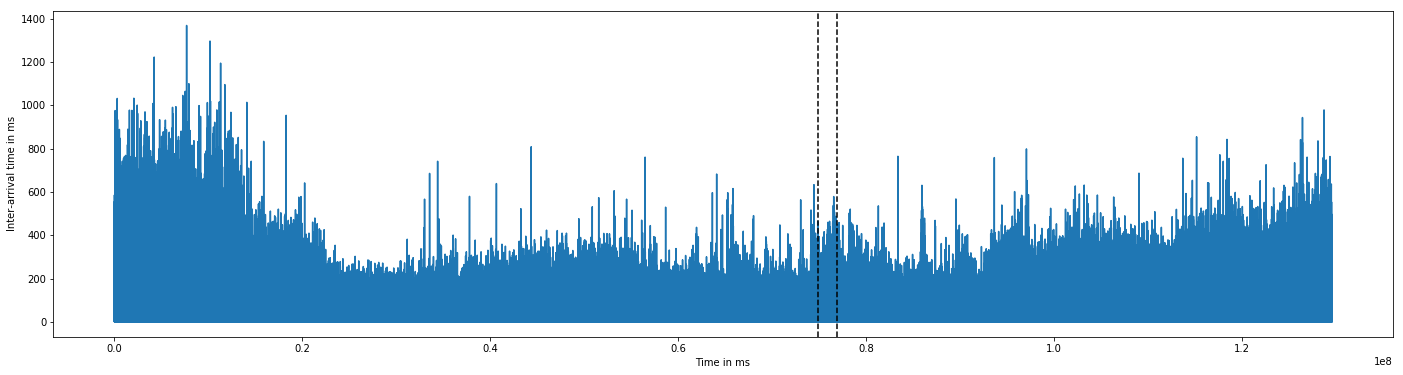

In [128]:
plt.figure(figsize=(24,6))
plt.plot(twitter[:-1], np.diff(twitter))
plt.axvline(x=twitter[4200000], color="black", linestyle="--")
plt.axvline(x=twitter[4400000], color="black", linestyle="--")
plt.xlabel("Time in ms")
plt.ylabel("Inter-arrival time in ms")
summarize(twitter)

CV 5.370613716372059
Mean Lambda <function segment_mean_rate at 0x7f07182e7950>
# of querries 200000
Duration 33.11236666666667


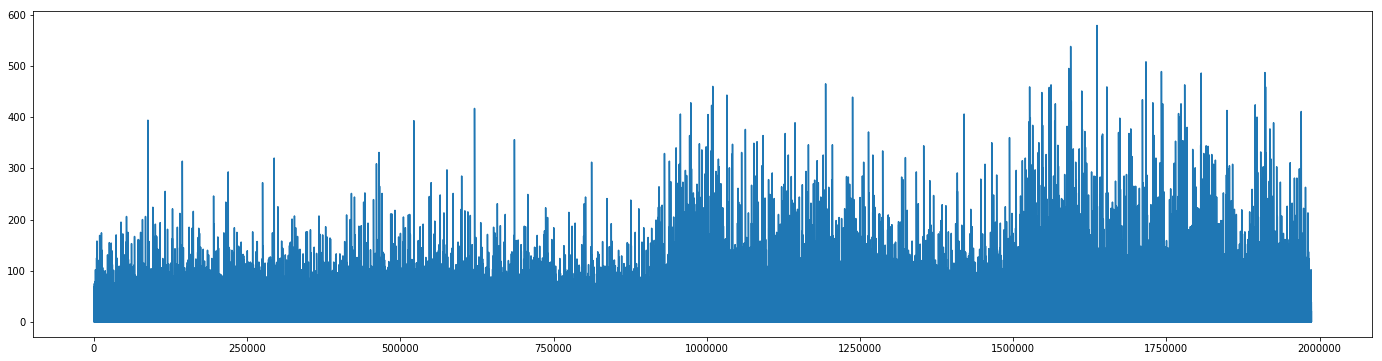

In [121]:
twitter_segment = twitter[4200000:4400000]
twitter_segment = twitter_segment - twitter_segment[0]
plt.figure(figsize=(24,6))
plt.plot(twitter_segment[:-1], np.diff(twitter_segment))
summarize(twitter_segment)

In [135]:
summarize(twitter_segment[:int(200000/8)]/(50/segment_mean_rate(twitter_segment)))
summarize(twitter_segment[:int(200000/4)]/(100/segment_mean_rate(twitter_segment)))
summarize(twitter_segment[:int(200000/2)]/(200/segment_mean_rate(twitter_segment)))
summarize(twitter_segment/(400/segment_mean_rate(twitter_segment)))

CV 3.61665793056356
Mean Lambda 47.66381014528913
# of querries 25000
Duration 8.741782610256726
CV 3.726174343405357
Mean Lambda 96.66621254731761
# of querries 50000
Duration 8.620730153521025
CV 4.109447698866587
Mean Lambda 194.6526757196324
# of querries 100000
Duration 8.562259216345153
CV 5.370613716372023
Mean Lambda 400.0
# of querries 200000
Duration 8.333333333333334
